In [1]:
from autoplanner import AutoPlanner
from mysession import production

In [2]:
ap = AutoPlanner(production, depth=500)

In [3]:
ap.set_verbose(False)
ap.construct_template_graph()

2018-11-15 08:41:20,565 - Browser@http://52.27.43.242/ - ERROR - INCONSISTENT AQUARIUM DATABASE - There where 2 missing AllowableFieldType models from the Aquarium database, which were ignored by trident. This happens when models are deleted from Aquarium which results in an inconsistent server database. Trident was unable resolve the following relationships which returned no models from the server: AllowableFieldType.where(id=[87, 87])
2018-11-15 08:41:37,285 - Browser@http://52.27.43.242/ - ERROR - INCONSISTENT AQUARIUM DATABASE - There where 1 missing FieldValue models from the Aquarium database, which were ignored by trident. This happens when models are deleted from Aquarium which results in an inconsistent server database. Trident was unable resolve the following relationships which returned no models from the server: FieldValue.where(id=[585701])
2018-11-15 08:41:39,133 - Browser@http://52.27.43.242/ - ERROR - INCONSISTENT AQUARIUM DATABASE - There where 1 missing AllowableField

Example edges

input <AllowableFieldType sample_type={'rid': 62246, 'id': 5, 'name': 'Yeast Strain', 'description': 'A strain of yeast distinguished from others by genomic or plasmid modifications', 'created_at': '2013-10-16T14:37:29.000-07:00', 'updated_at': '2015-12-08T17:40:57.000-08:00'} object_type={'rid': 62237, 'id': 797, 'name': '96 Well PCR Plate', 'description': 'A 96 Well plate that can fit into a thermocycler.', 'min': 0, 'max': 1, 'handler': 'collection', 'safety': 'No safety information', 'cleanup': 'No cleanup information', 'data': 'No data', 'vendor': 'No vendor information', 'created_at': '2018-08-03T18:10:19.000-07:00', 'updated_at': '2018-08-03T18:49:13.000-07:00', 'unit': 'plate', 'cost': 0.01, 'release_method': 'return', 'release_description': '', 'sample_type_id': 5, 'image': '', 'prefix': '', 'rows': 8, 'columns': 12} rid=61243>
output <AllowableFieldType sample_type={'rid': 62246, 'id': 5, 'name': 'Yeast Strain', 'description': 'A strain of yeast distinguished f

In [7]:
wc = ap.weight_container

wires = wc.collect_wires(wc.plans)
operations = wc.collect_operations(wc.plans)

edges = wc.to_edges(wires, operations)

In [8]:
from collections import Counter
import functools

class HashCounter(Counter):

    def __init__(self, data=(), hash_function=None):
        self.hash_function = hash_function
        super().__init__()
        for d in data:
            self[d] += 1

    def by_attrs(self, *attrs):
        self.hash_function = functools.partial(self.hash_by_attributes, attributes=attrs)
        return self

    @staticmethod
    def hash_by_attributes(data, attributes=()):
        return "%".join([str(getattr(data, x, None)) for x in attributes])

    def __setitem__(self, k, v):
        return super().__setitem__(self.hash_function(k), v)

    def __getitem__(self, k):
        return super().__getitem__(self.hash_function(k))

class HashCounterView(object):
    
    def __init__(self, data):
        self.data = data
        self.counters = {}
    
    def register(self, name, function):
        new_counter = HashCounter(self.data, hash_function=function)
        self.counters[name] = new_counter
        return new_counter
        
    def __getitem__(self, key):
        return self.counters[key]
    
    def __setitem__(self, key, val):
        return self.register(key, val)
        

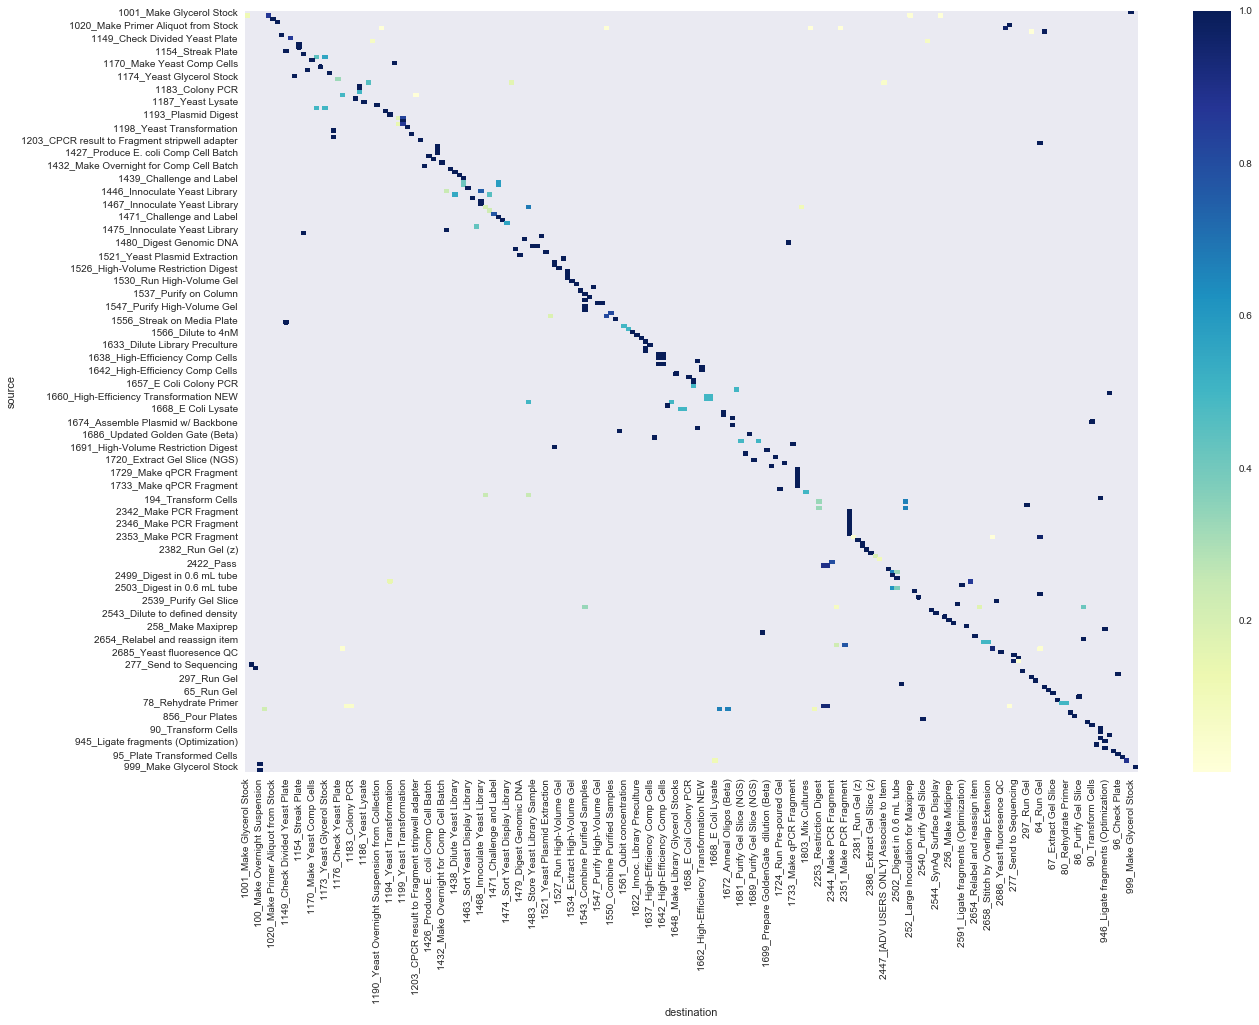

In [27]:
%matplotlib inline

from collections import defaultdict
from uuid import uuid4
import pylab as plt
import seaborn as sns
import pandas as pd


def external_aft_hash(aft):
    """A has function representing two 'extenal' :class:`pydent.models.AllowableFieldType` models (i.e. a wire)"""
    if not aft or not aft.field_type:
        return str(uuid4())
    if aft.field_type.part:
        part = True
    else:
        part = False
    return "{optype}-{object_type}-{sample_type}-{part}".format(
            optype=aft.field_type.operation_type.id,
            object_type=aft.object_type_id,
            sample_type=aft.sample_type_id,
            part=part,
    )

def myhash(pair):
    return "{}->{}".format(external_aft_hash(pair[0]), external_aft_hash(pair[1]))

# def groupby(iterable, key=None):
#     grouped = defaultdict(list)
#     for d in iterable:
#         grouped[key(d)].append(d)
#     return grouped

counter = HashCounter(hash_function=myhash)
node_counter = HashCounter(hash_function=external_aft_hash)
for n1, n2 in edges:
    counter[(n1,n2)] += 1
    node_counter[n1] += 1
    
rows = []
for n1, n2 in edges:
    if n1 and n2:
        rows.append({
            "source": "{}_{}".format(n1.id, n1.field_type.operation_type.name),
            "destination": "{}_{}".format(n2.id, n2.field_type.operation_type.name),
            "count": counter[(n1, n2)],
            "total": node_counter[n1],
        }
    )

df_long = pd.DataFrame(rows)
df_long.drop_duplicates(inplace=True)
df_long['weight'] = df_long['count'] / df_long['total']
df_long.sort_values(by=['weight'], inplace=True, ascending=True)
df = df_long.iloc[:].pivot("source", "destination", "weight")
df

# # df.fillna(0, inplace=True)
sns.set()
f, ax = plt.subplots(figsize=(20, 14))
sns.heatmap(df, annot=False, ax=ax, cmap="YlGnBu")
plt.savefig("/Users/justinvrana/Desktop/all_op_types.pdf", format="pdf")

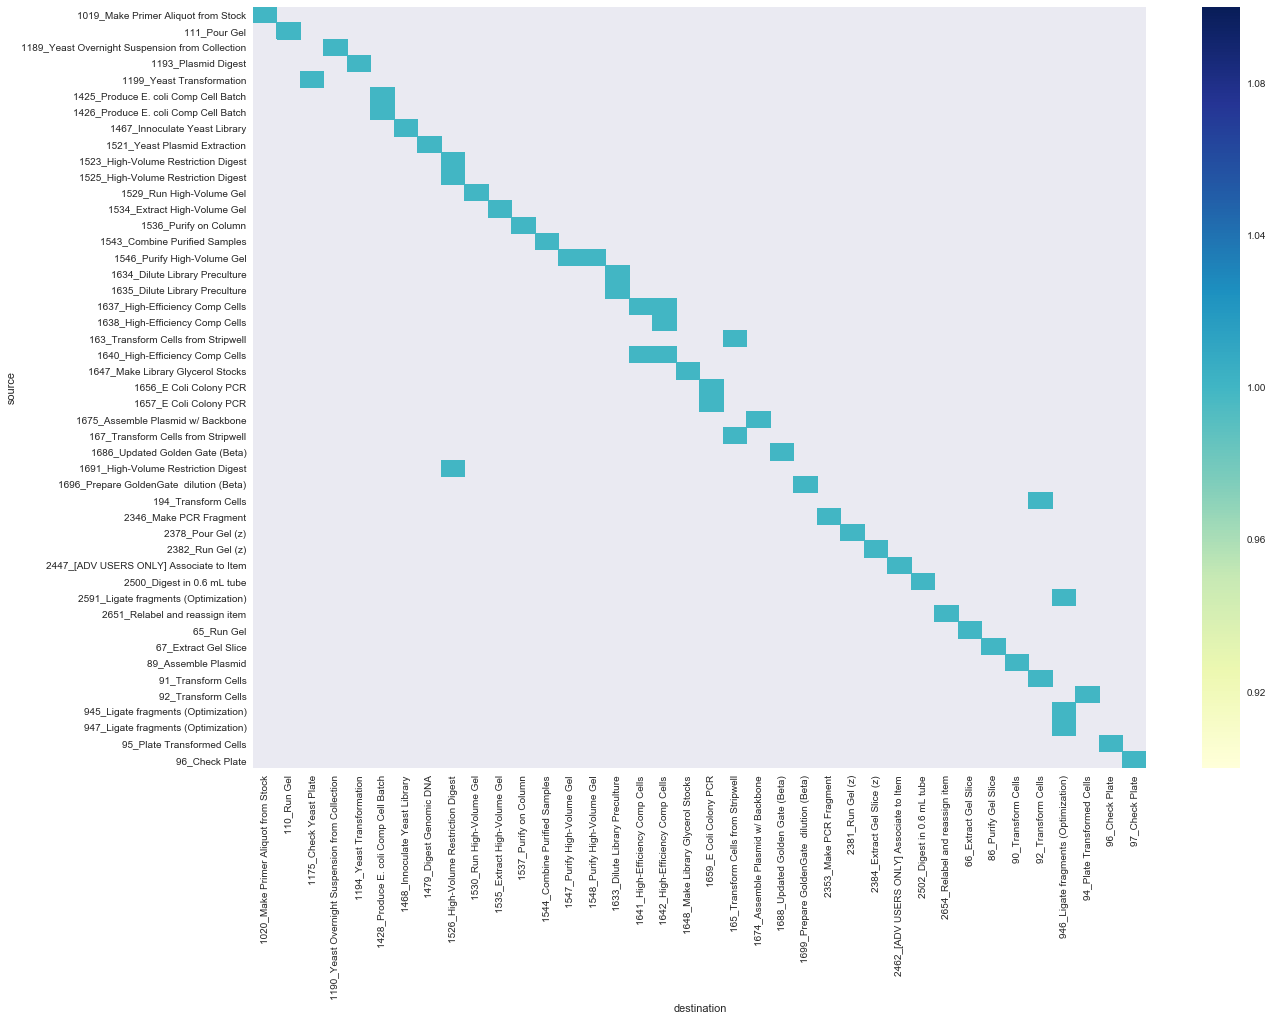

In [26]:
df_long.sort_values(by=['weight'], inplace=True, ascending=True)
df = df_long.iloc[:].pivot("source", "destination", "weight")
df

# # df.fillna(0, inplace=True)
sns.set()
f, ax = plt.subplots(figsize=(20, 14))
sns.heatmap(df, annot=False, ax=ax, cmap="YlGnBu")

# plt.savefig("/Users/justinvrana/Desktop/top_50_optypes.pdf", format="pdf")

In [44]:
import math
x = 
(1-x)/(1+x)

0.0

In [37]:
df_long

,count,destination,source,total,weight
2802,1,2666_Fragment Analyzing,2353_Make PCR Fragment,432,0.002315
4051,1,1203_CPCR result to Fragment stripwell adapter,1185_Colony PCR,324,0.003086
5852,1,1964_Send Email,102_Make Miniprep,313,0.003195
4864,1,2346_Make PCR Fragment,102_Make Miniprep,313,0.003195
991,1,254_Large Inoculation for Midiprep,100_Make Overnight Suspension,275,0.003636
7054,4,298_Run Gel,110_Run Gel,457,0.008753
5804,3,1192_Plasmid Digest,102_Make Miniprep,313,0.009585
42,2,273_Send to Sequencing,79_Rehydrate Primer,190,0.010526
4769,4,252_Large Inoculation for Maxiprep,100_Make Overnight Suspension,275,0.014545
4568,6,1549_Combine Purified Samples,102_Make Miniprep,313,0.019169


In [ ]:
afts_long = []


In [309]:
flights_long = sns.load_dataset("flights")
flights_long.pivot("month", "year", "passengers")

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


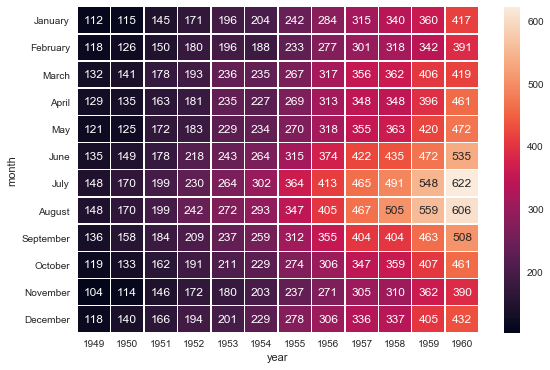

In [293]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [33]:
ops = ap.weight_container.collect_operations(ap.weight_container.plans)
wc = ap.weight_container
wires = wc.collect_wires(wc.plans)
operations = wc.collect_operations(wc.plans)
edges = wc.to_edges(wires, operations)
# set([op.operation_type.name for op in ops])

In [ ]:
dict()

In [296]:
from collections import Counter
import functools

class HashCounter(Counter):

    def __init__(self, data=(), hash_function=None):
        self.hash_function = hash_function
        super().__init__()
        for d in data:
            self[d] += 1

    def by_attrs(self, *attrs):
        self.hash_function = functools.partial(self.hash_by_attributes, attributes=attrs)
        return self

    @staticmethod
    def hash_by_attributes(data, attributes=()):
        return "%".join([str(getattr(data, x, None)) for x in attributes])

    def __setitem__(self, k, v):
        return super().__setitem__(self.hash_function(k), v)

    def __getitem__(self, k):
        return super().__getitem__(self.hash_function(k))

class HashCounterView(object):
    
    def __init__(self, data):
        self.data = data
        self.counters = {}
    
    def register(self, name, function):
        new_counter = HashCounter(self.data, hash_function=function)
        self.counters[name] = new_counter
        return new_counter
        
    def __getitem__(self, key):
        return self.counters[key]
    
    def __setitem__(self, key, val):
        return self.register(key, val)
        
hashview = HashCounterView([1,2,3,3,2,1,2,3])
hashview.register('bystr', lambda x: str(x))
hashview.register('byid', lambda x: id(x))
hashview['bystr']
hashview['byid']

HashCounter({4557157712: 2, 4557157744: 3, 4557157776: 3})

In [242]:
c = HashCounter(hash_function=lambda x, y: x*y)
c[1,2] += 1

TypeError: <lambda>() missing 1 required positional argument: 'y'

In [205]:
class HashView(object):
    
    def __init__(self, data):
        self.data = data
        self.counters = {}
    
    def register(self, name, function):
        new_counter = HashCounter(self.data, hash_function=function)
        self.counters[name] = new_counter
        return new_counter
        
    def __getitem__(self, key):
        return self.counter[key]
    
    def __setitem__(self, key, val):
        return self.register(key, val)
        
hashview = HashView([1,2,3,3,2,1,2,3])
hashview['bystr'] = lambda x: str(x)

AttributeError: 'HashCounter' object has no attribute 'hash_function'

In [187]:
c = Counter()
for f in [foo, foo2, foo3, foo4]*10000:
    c[hasher.function(f)] += 1

In [54]:
fvs = list(ap.browser.model_cache['FieldValue'].values())
fv = fvs[0]
schema = fv.model_schema(many=True)
data = schema.dump(fvs[:100])
pass

In [65]:
import json
import dill as pickle
from mysession import production
for fv in fvs[:10]:
    data = json.loads(json.dumps(fvs[0].__dict__, default=lambda o: None))
    fv2 = production.FieldValue.load(data)
    print(fv2.dump())

{'_session': <AqSession(name=None, AqHTTP=<AqHTTP(vrana, http://52.27.43.242/)>))>, 'column': None, 'value': None, 'container': None, 'id': 885688, 'created_at': '2018-10-23T20:47:59.000-07:00', 'child_sample_name': None, 'parent_class': 'Operation', 'rid': 28242, 'child_sample_id': None, 'raw': {'wires_as_dest': [], 'allowable_field_type': None, 'item': None, 'operation': None, 'parent_sample': None, 'sample': None, 'field_type': None, 'wires_as_source': [], 'column': None, 'row': None, 'role': 'input', 'id': 885688, 'name': 'Genetic Material', 'parent_class': 'Operation', 'parent_id': 257437, 'child_sample_id': None, 'child_item_id': None, 'field_type_id': 6615, 'allowable_field_type_id': 3817, 'value': None, 'container': None, '_session': None, '_rid': 5954, 'rid': 3364, 'loaded_fields': {'wires_as_dest': None, 'child_sample_name': None, 'allowable_field_type': None, 'allowable_child_types': None, 'item': None, 'operation': None, 'array': None, 'parent_sample': None, 'sid': None, 's

In [5]:
ap.search_graph(None, nursery.ObjectType.find_by_name("Yeast Glycerol Stock"), nursery.ObjectType.find_by_name("Fragment Stock"))


**************************************************
Fragment Stock >> Yeast Glycerol Stock
**************************************************

166671.11096297397


UnboundLocalError: local variable 'aft' referenced before assignment

In [10]:
from copy import deepcopy, copy



In [ ]:
import dill as pickle
with open('temp.pkl', 'wb') as f:
    pickle.dump(ap, f)

In [ ]:
with open('temp.pkl', 'rb') as f:
    session = pickle.load(f)

In [ ]:
session

In [21]:
import sys
sys.getsizeof(ap)

56

In [22]:
ap